# Imports
Most of Exploratory Data Analysis / Pre-Processing of this notebook was adapted from https://github.com/AnshulSaini17/Income_evaluation/blob/main/Income_Evalutation.ipynb

In [147]:
!pip install pyreadr -q
import pandas as pd
import pyreadr
import plotly.express as px

# Finding Dataset

In [148]:
# Adapted from https://ofajardo.github.io/pyreadr/_build/html/index.html
path = pyreadr.download_file("https://github.com/dutangc/CASdatasets/raw/refs/heads/master/data/beMTPL97.rda", "/content/beMTPL97.rda")
mtpl97 = pyreadr.read_r(path)
print(mtpl97)

OrderedDict([('beMTPL97',             id      expo claim  nclaims        amount      average coverage  \
0            1  1.000000     1        1   1618.001036  1618.001036      TPL   
1            2  1.000000     0        0      0.000000          NaN     TPL+   
2            3  1.000000     0        0      0.000000          NaN      TPL   
3            4  1.000000     0        0      0.000000          NaN      TPL   
4            5  0.046575     1        1    155.974606   155.974606      TPL   
...        ...       ...   ...      ...           ...          ...      ...   
163207  163208  1.000000     0        0      0.000000          NaN      TPL   
163208  163209  1.000000     0        0      0.000000          NaN      TPL   
163209  163210  1.000000     0        0      0.000000          NaN      TPL   
163210  163211  1.000000     0        0      0.000000          NaN      TPL   
163211  163212  1.000000     1        2  13818.229594  6909.114797    TPL++   

        ageph     sex  bm

In [149]:
df = pd.DataFrame(mtpl97['beMTPL97'])
df

,id,expo,claim,nclaims,amount,average,coverage,ageph,sex,bm,power,agec,fuel,use,fleet,postcode,long,lat
0,1,1.000000,1,1,1618.001036,1618.001036,TPL,50,male,5,77,12,gasoline,private,0,1000,4.355223,50.845386
1,2,1.000000,0,0,0.000000,NaN,TPL+,64,female,5,66,3,gasoline,private,0,1000,4.355223,50.845386
2,3,1.000000,0,0,0.000000,NaN,TPL,60,male,0,70,10,diesel,private,0,1000,4.355223,50.845386
3,4,1.000000,0,0,0.000000,NaN,TPL,77,male,0,57,15,gasoline,private,0,1000,4.355223,50.845386
4,5,0.046575,1,1,155.974606,155.974606,TPL,28,female,9,70,7,gasoline,private,0,1000,4.355223,50.845386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163207,163208,1.000000,0,0,0.000000,NaN,TPL,37,male,5,40,10,diesel,work,0,9990,3.421256,51.199975
163208,163209,1.000000,0,0,0.000000,NaN,TPL,44,male,0,55,6,diesel,private,0,9990,3.421256,51.199975
163209,163210,1.000000,0,0,0.000000,NaN,TPL,50,male,0,40,10,diesel,private,0,9990,3.421256,51.199975
163210,163211,1.000000,0,0,0.000000,NaN,TPL,43,male,0,66,7,gasoline,private,0,9990,3.421256,51.199975


# Exploratory Data Analysis

In [150]:
df.shape

(163212, 18)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163212 entries, 0 to 163211
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   id        163212 non-null  int32   
 1   expo      163212 non-null  float64 
 2   claim     163212 non-null  category
 3   nclaims   163212 non-null  int32   
 4   amount    163212 non-null  float64 
 5   average   18276 non-null   float64 
 6   coverage  163212 non-null  category
 7   ageph     163212 non-null  int32   
 8   sex       163212 non-null  category
 9   bm        163212 non-null  int32   
 10  power     163212 non-null  int32   
 11  agec      163212 non-null  int32   
 12  fuel      163212 non-null  category
 13  use       163212 non-null  category
 14  fleet     163212 non-null  category
 15  postcode  163212 non-null  int32   
 16  long      163212 non-null  float64 
 17  lat       163212 non-null  float64 
dtypes: category(6), float64(5), int32(7)
memory usage: 11.5 MB


In [152]:
df.columns

Index(['id', 'expo', 'claim', 'nclaims', 'amount', 'average', 'coverage',
       'ageph', 'sex', 'bm', 'power', 'agec', 'fuel', 'use', 'fleet',
       'postcode', 'long', 'lat'],
      dtype='object')

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
min_expo = min(df['expo'])
max_expo = max(df['expo'])
print(f"Exposure range: [{min_expo:.4f}, {max_expo}]")

Exposure range: [0.0027, 1.0]


In [155]:
# Check for null values
df.isnull().sum()

,0
id,0
expo,0
claim,0
nclaims,0
amount,0
average,144936
coverage,0
ageph,0
sex,0
bm,0


It looks like there are null values in the average column but this may just be because the amount is 0. Lets do some futher analysis

In [156]:
avg_null = df[['average', 'amount']]
avg_null = avg_null[avg_null['average'].isnull() & avg_null['amount'] != 0].sum()
avg_null.head()

,0
average,0.0
amount,0.0


Ok, so we can see there are no cases where the average is null and the amount isn't zero, so we can just set the average to zero in these cases

In [157]:
df['average'] = df['average'].fillna(0)
# Check again for null values
df.isnull().sum()

,0
id,0
expo,0
claim,0
nclaims,0
amount,0
average,0
coverage,0
ageph,0
sex,0
bm,0


In [158]:
categorical = [var for var in df.columns if df[var].dtype=='category']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 6 categorical variables

The categorical variables are :

 ['claim', 'coverage', 'sex', 'fuel', 'use', 'fleet']


In [159]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='int32' or df[var_1].dtype=='float64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 12 numerical variables

The numerical variables are :

 ['id', 'expo', 'nclaims', 'amount', 'average', 'ageph', 'bm', 'power', 'agec', 'postcode', 'long', 'lat']


## Outliers

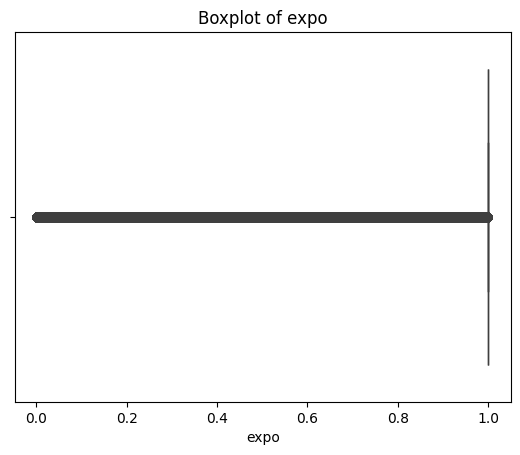

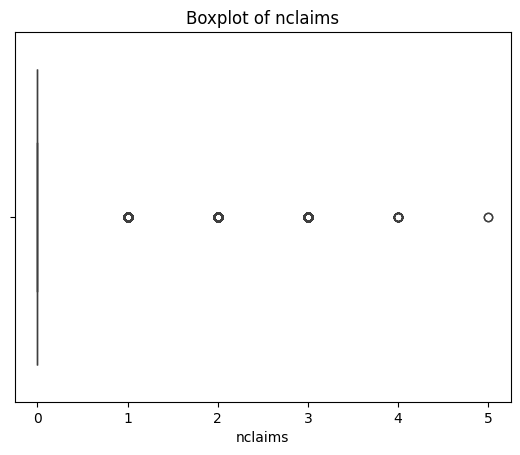

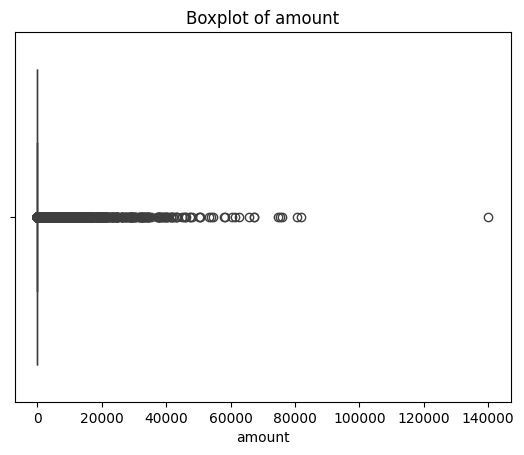

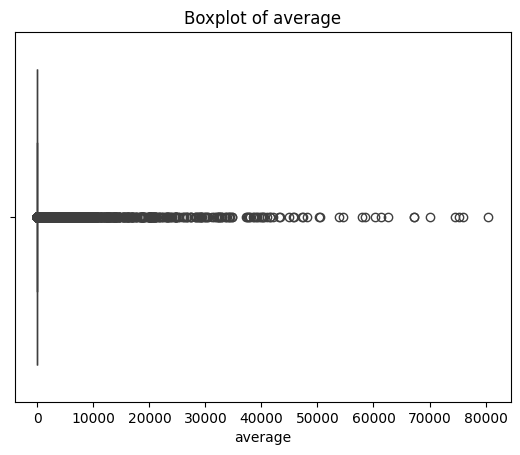

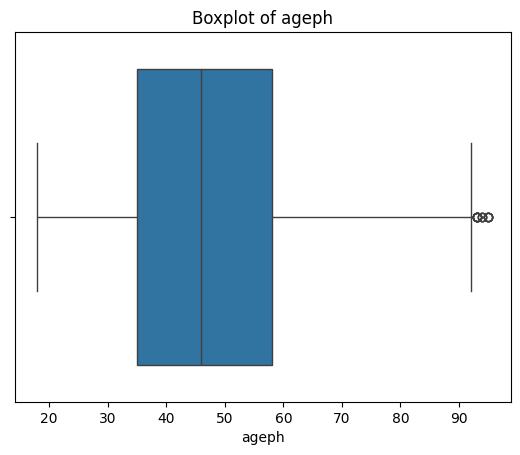

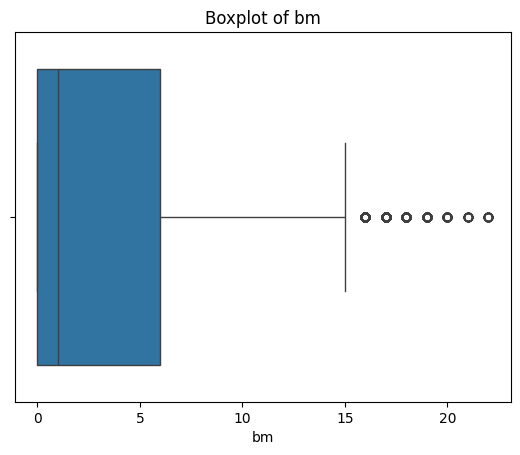

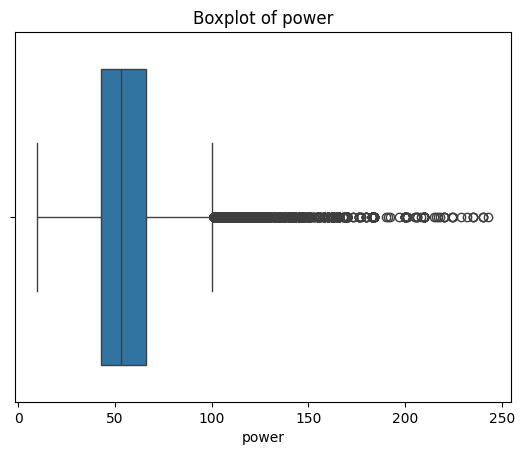

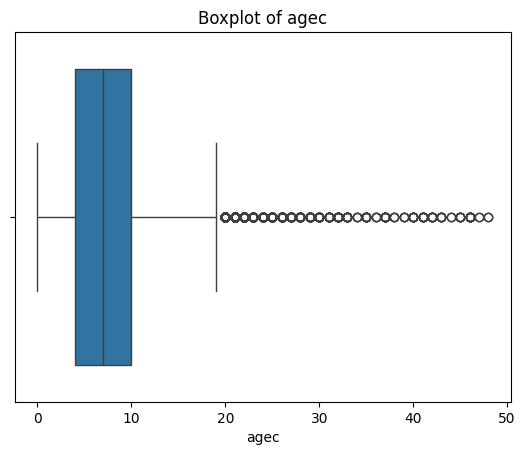

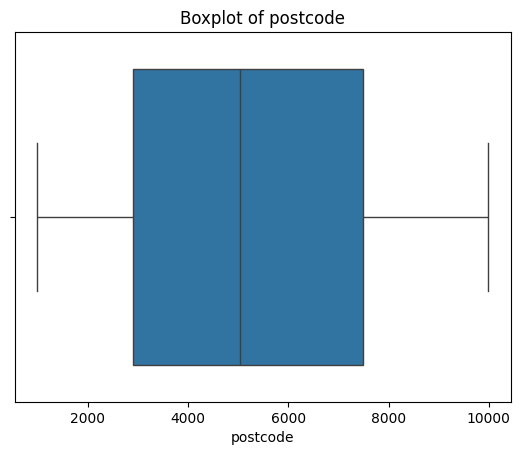

In [160]:
for i in numerical:
  if i not in ['id','coverage','long','lat']:
    sns.boxplot(x=df[i])
    plt.title(f"Boxplot of {i}")
    plt.show()

Observations:
- nclaims, ageph(policy holder age), bm, agec(vehicle's age) look like ordinal variables, as the outlier positions have very strict spacing.
- For nclaims and bm, they seem to be integers between [0,5] and [0,22] respectively. In this relatively small space size, be cautious with regression models.
- Refer to this source for the bonus-malus system of responsible driving, a.k.a. the "bm" column's values; note that the dataset's situation has no negative scores. From the dataset discription, lower score = better claim history. From the boxplot, 75% of the data resides in around a score of 0-6, which denotes decent claim history - this is consistent with the nclaims, amount & average data, which are mostly 0, indicating no claim being made by those safe drivers.
  
  https://www.lalux.lu/en/blog/the-bonus-malus-system-towards-more-responsible-driving
- The variable exposure is mostly 1 - from the dataset's description, this would mean that at least 75% of the drivers would be driving all year around, thus 100% of their year was "exposed" to potential risk.
- It looks like there is one extreme outlier in amount, we will also remove that.

In [161]:
# Double check our observations
for col in ['nclaims', 'ageph', 'bm', 'agec']:
  print(df[col].value_counts().head(10), "\n")
# Remove outlier
outlier_amt = df.loc[df['amount']>120000,'amount'].index
df.drop(index=outlier_amt,inplace=True)
print(df['amount'].describe())


nclaims
0    144936
1     16539
2      1556
3       162
4        17
5         2
Name: count, dtype: int64 

ageph
43    4002
49    3994
47    3944
50    3923
51    3906
45    3899
39    3891
38    3882
42    3882
41    3874
Name: count, dtype: int64 

bm
0     61647
1     26969
5     11954
2      9522
4      8346
11     8304
10     6625
9      6241
6      5278
7      5266
Name: count, dtype: int64 

agec
6     15053
8     13988
7     13886
2     13726
4     12773
3     12517
9     12485
5     12432
10    11549
11    10058
Name: count, dtype: int64 

count    163211.000000
mean        161.293893
std        1330.263575
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       81946.162484
Name: amount, dtype: float64


## Data Visualization

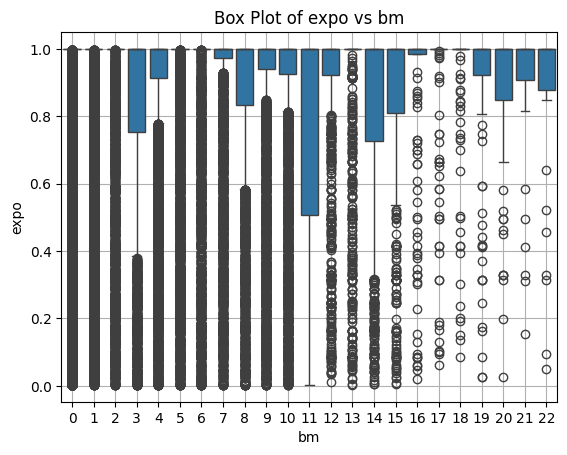

In [162]:
sns.boxplot(x='bm', y='expo', data=df)
plt.title('Box Plot of expo vs bm')
plt.grid(True)
plt.show()

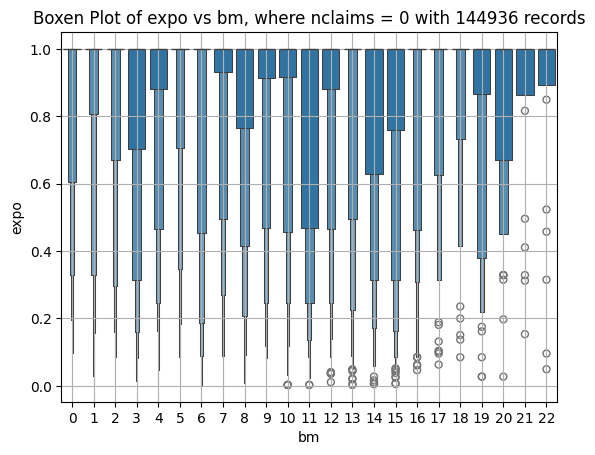

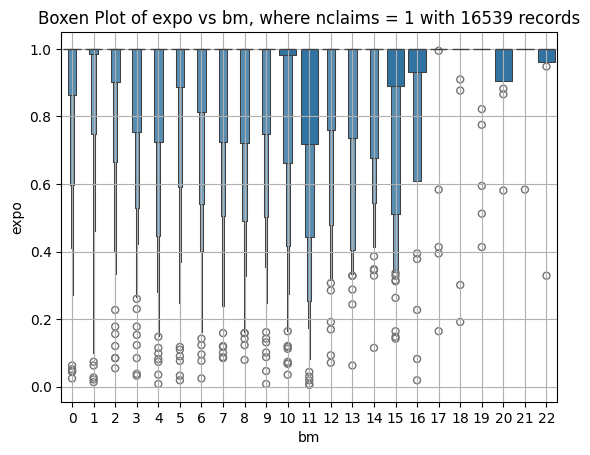

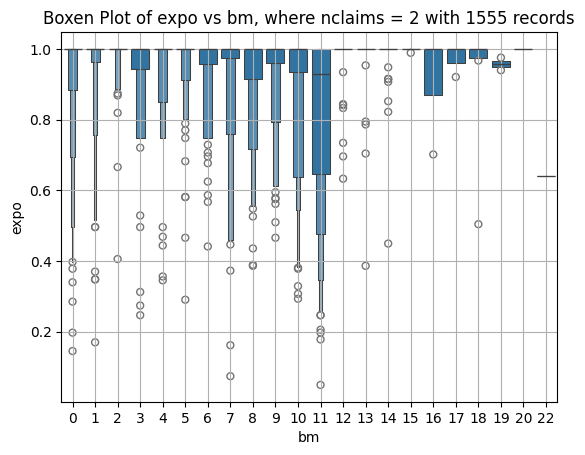

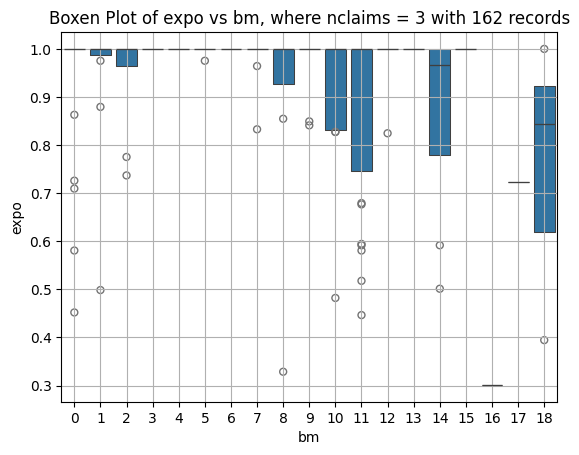

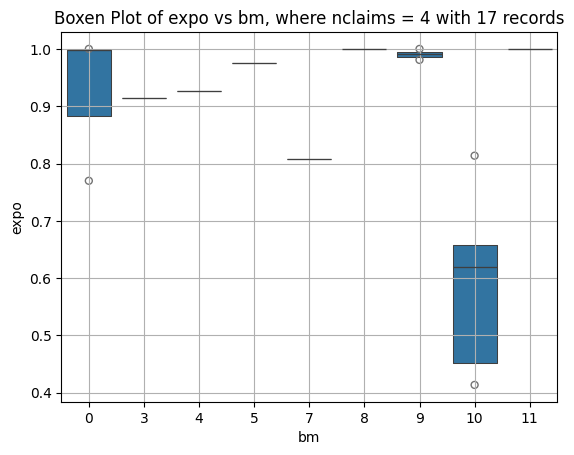

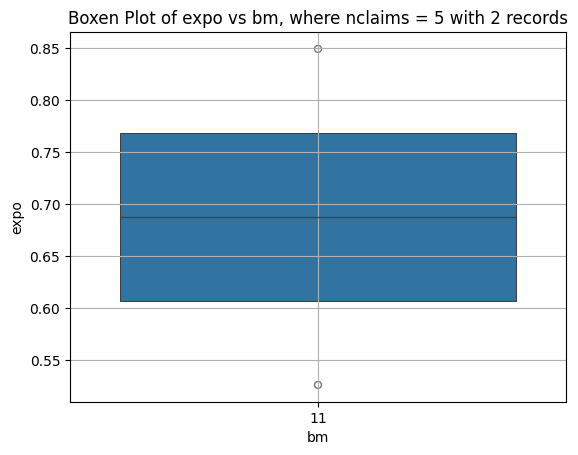

In [163]:
for num_clm in range(0, 6):
  df_flt = df[df['nclaims'] == num_clm]
  ct = df_flt['expo'].count()
  sns.boxenplot(x='bm', y='expo', data=df_flt)
  plt.title(f'Boxen Plot of expo vs bm, where nclaims = {num_clm} with {ct} records')
  plt.grid(True)
  plt.show()

We can see that vast majority of data has exposure very near 1.0; even for users with more claims, this

In [164]:
df['coverage_re'] = df['coverage'].map({'TPL': 1, 'TPL+': 2, 'TPL++': 3})
df.drop(columns=['id','coverage','long','lat'], inplace=True)
df

,expo,claim,nclaims,amount,average,ageph,sex,bm,power,agec,fuel,use,fleet,postcode,coverage_re
0,1.000000,1,1,1618.001036,1618.001036,50,male,5,77,12,gasoline,private,0,1000,1
1,1.000000,0,0,0.000000,0.000000,64,female,5,66,3,gasoline,private,0,1000,2
2,1.000000,0,0,0.000000,0.000000,60,male,0,70,10,diesel,private,0,1000,1
3,1.000000,0,0,0.000000,0.000000,77,male,0,57,15,gasoline,private,0,1000,1
4,0.046575,1,1,155.974606,155.974606,28,female,9,70,7,gasoline,private,0,1000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163207,1.000000,0,0,0.000000,0.000000,37,male,5,40,10,diesel,work,0,9990,1
163208,1.000000,0,0,0.000000,0.000000,44,male,0,55,6,diesel,private,0,9990,1
163209,1.000000,0,0,0.000000,0.000000,50,male,0,40,10,diesel,private,0,9990,1
163210,1.000000,0,0,0.000000,0.000000,43,male,0,66,7,gasoline,private,0,9990,1


In [165]:
corr = df[['expo','claim','nclaims','amount','average','bm', 'coverage_re', 'postcode']].corr()
corr

,expo,claim,nclaims,amount,average,bm,coverage_re,postcode
expo,1.000000,0.055657,0.052267,0.005758,0.005763,-0.104115,0.034899,0.071068
claim,0.055657,1.000000,0.949188,0.341461,0.335502,0.096543,-0.008556,-0.017205
nclaims,0.052267,0.949188,1.000000,0.359407,0.318049,0.103242,-0.011535,-0.017996
amount,0.005758,0.341461,0.359407,1.000000,0.972284,0.044590,-0.002543,-0.002771
average,0.005763,0.335502,0.318049,0.972284,1.000000,0.040028,-0.001150,-0.003069
bm,-0.104115,0.096543,0.103242,0.044590,0.040028,1.000000,-0.094263,-0.026027
coverage_re,0.034899,-0.008556,-0.011535,-0.002543,-0.001150,-0.094263,1.000000,-0.150797
postcode,0.071068,-0.017205,-0.017996,-0.002771,-0.003069,-0.026027,-0.150797,1.000000


In [166]:
numerical = numerical[1:-2]
print(numerical)

['expo', 'nclaims', 'amount', 'average', 'ageph', 'bm', 'power', 'agec', 'postcode']


<ipython-input-167-6951f0f38bc0>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



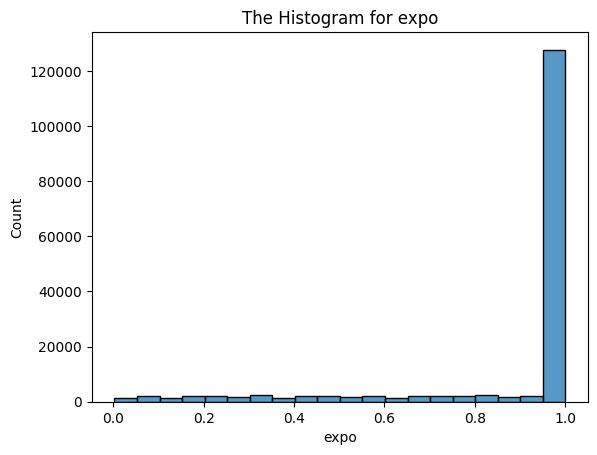

<ipython-input-167-6951f0f38bc0>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



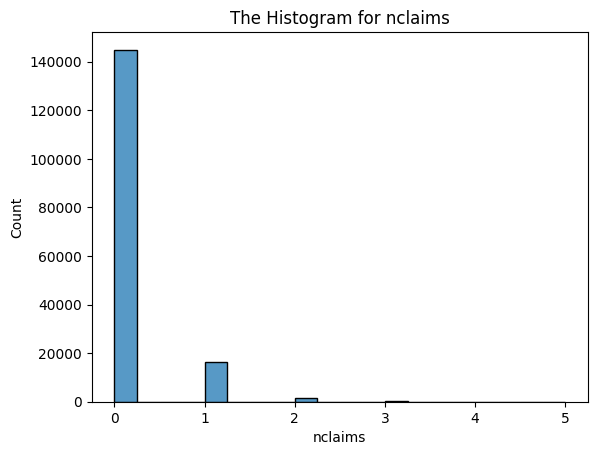

<ipython-input-167-6951f0f38bc0>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



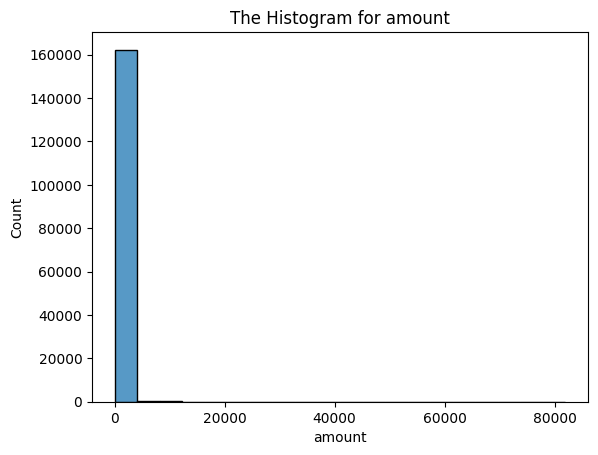

<ipython-input-167-6951f0f38bc0>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



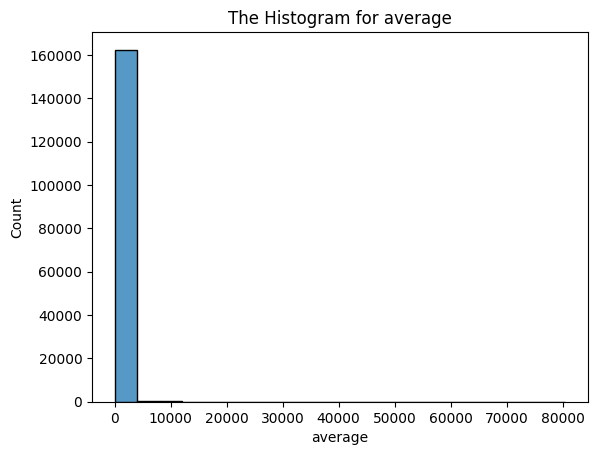

<ipython-input-167-6951f0f38bc0>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



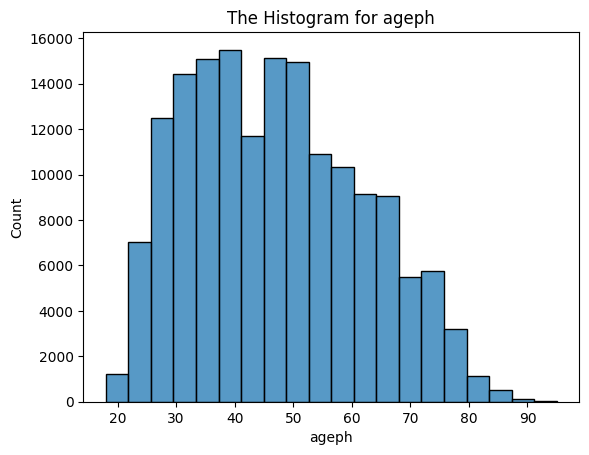

<ipython-input-167-6951f0f38bc0>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



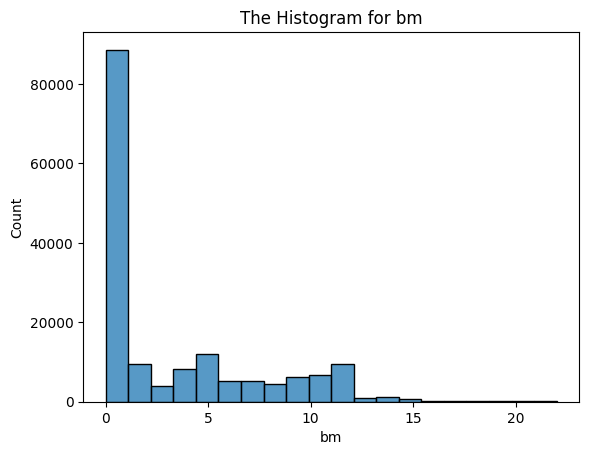

<ipython-input-167-6951f0f38bc0>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



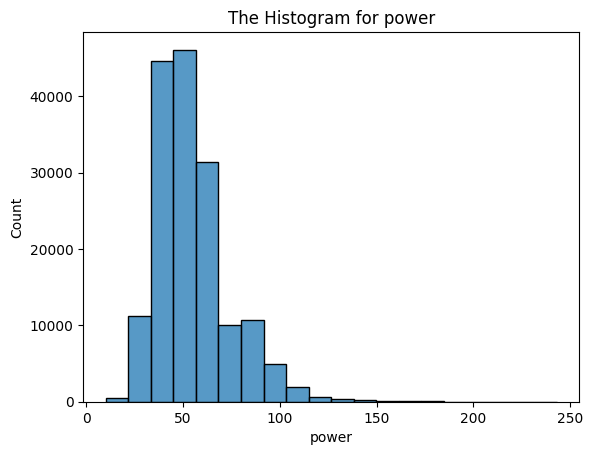

<ipython-input-167-6951f0f38bc0>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



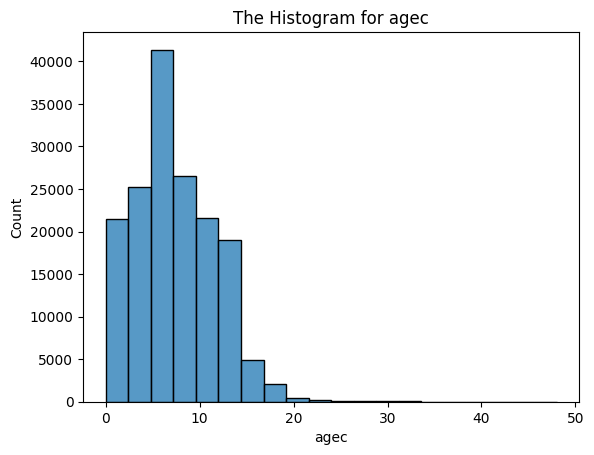

<ipython-input-167-6951f0f38bc0>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



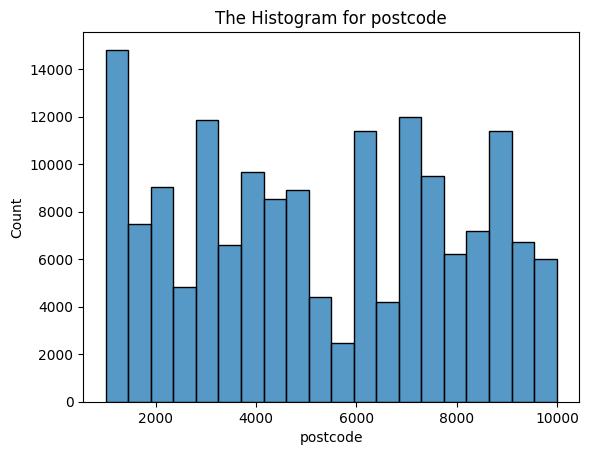

In [167]:
for i in numerical:
    sns.histplot(x=df[i], palette='Set1',bins=20)
    plt.title("The Histogram for {}".format(i))
    plt.show()

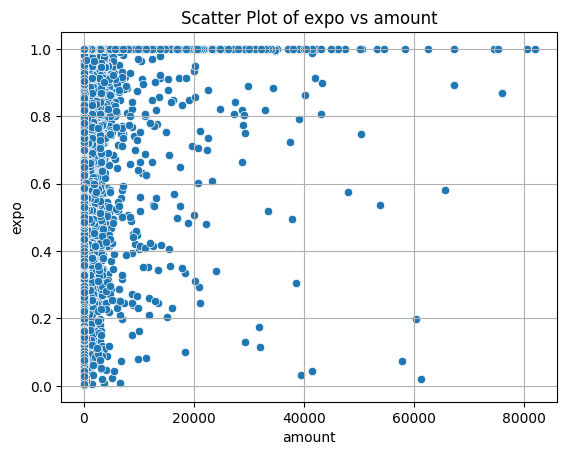

In [168]:
# dive into correlation between amount and expo
sns.scatterplot(x='amount', y='expo', data=df)
plt.title('Scatter Plot of expo vs amount')
plt.grid(True)
plt.show()

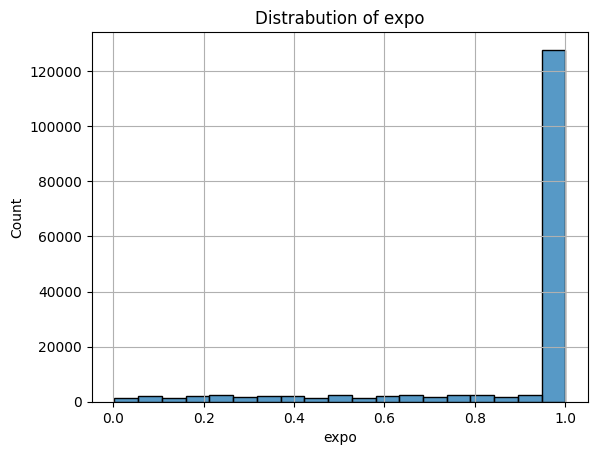

In [169]:
sns.histplot(x='expo', data=df)
plt.title('Distrabution of expo')
plt.grid(True)
plt.show()

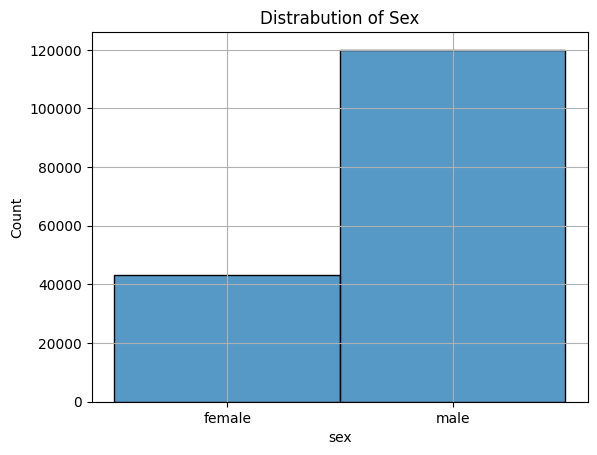

In [170]:
sns.histplot(x='sex', data=df)
plt.title('Distrabution of Sex')
plt.grid(True)
plt.show()

We can see there are more male drivers than female drivers

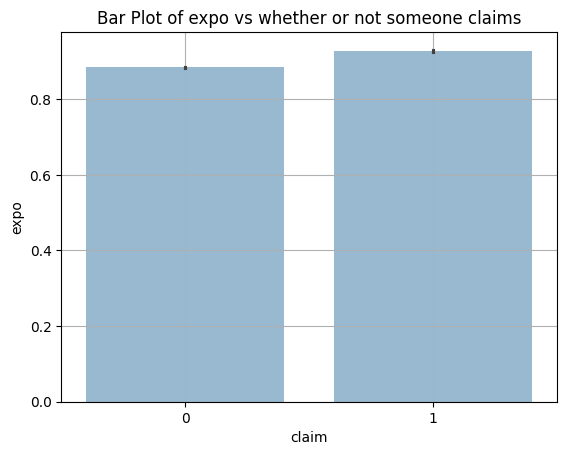

In [171]:
sns.barplot(x='claim', y='expo', data=df, alpha=0.5)
plt.title('Bar Plot of expo vs whether or not someone claims')
plt.grid(True)
plt.show()

In [172]:
fig = px.scatter(df, x="ageph", y="nclaims", color="sex",
                 title="Ageph vs Nclaims by Sex",
                 labels={"ageph": "Ageph", "nclaims": "Number of Claims", "sex": "Sex"})
fig.show()

In [173]:
fig = px.scatter(df, x="bm", y="nclaims", color="sex",
                 title="bm vs Nclaims by Sex",
                 labels={"bm": "bm", "nclaims": "Number of Claims", "sex": "Sex"})
fig.show()


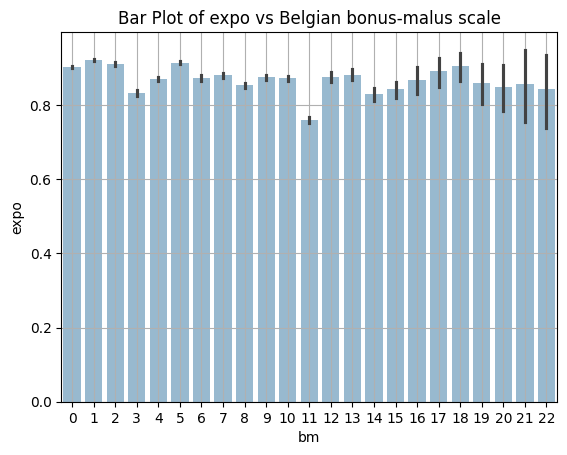

In [174]:
sns.barplot(x='bm', y='expo', data=df, alpha=0.5)
plt.title('Bar Plot of expo vs Belgian bonus-malus scale')
plt.grid(True)
plt.show()

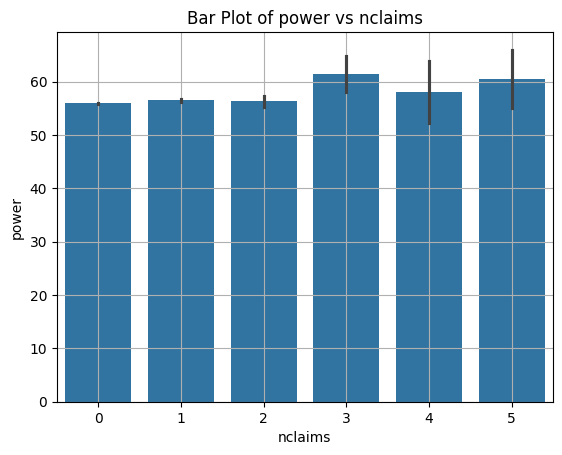

In [175]:
sns.barplot(x='nclaims', y='power', data=df)
plt.title('Bar Plot of power vs nclaims')
plt.grid(True)
plt.show()

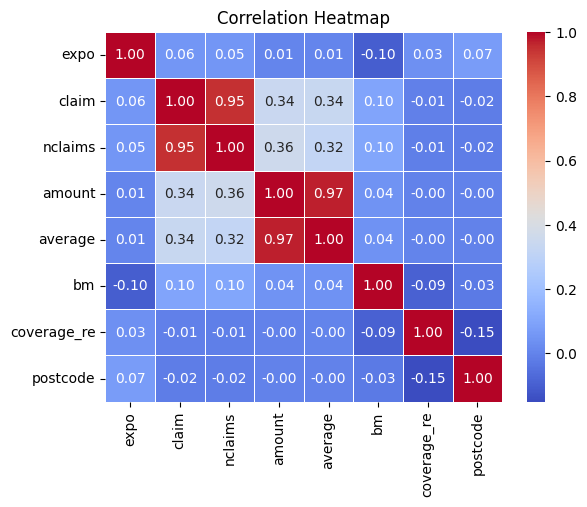

In [176]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

We can see there is very high correlation between claim and nclaims so we will have to drop claim in order to simulate real world scenario. (If an insurance company was trying to predict the number of claims a potential policy holder would make, they probably wouldnt know whether or not the policy hodler was going to make a claim). We also see that amount and average are very highly correlated, so to use them as an input to our model, we will have to drop the other.

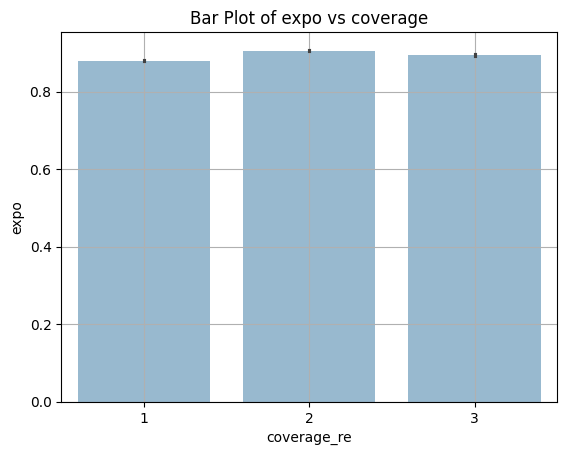

In [177]:
sns.barplot(x='coverage_re', y='expo', data=df, alpha=0.5)
plt.title('Bar Plot of expo vs coverage')
plt.grid(True)
plt.show()

View the distrabution of exposure and create a new column of low, med, high for easier visualization.

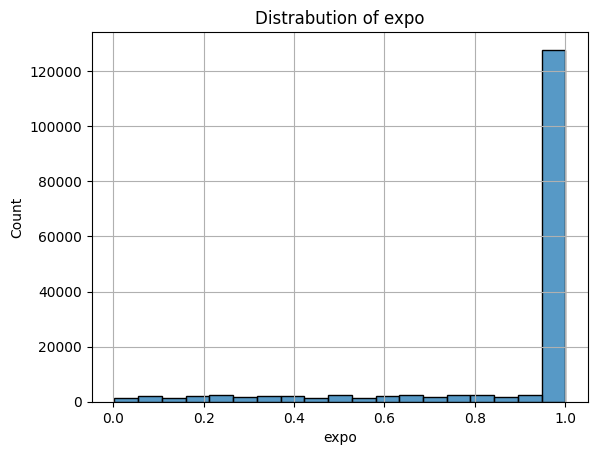

In [178]:
sns.histplot(x='expo', data=df)
plt.title('Distrabution of expo')
plt.grid(True)
plt.show()

In [179]:
# Break into .0-.4, .4-.8, .8-1.0
# Adapted from https://stackoverflow.com/questions/72081905/how-do-i-group-numerical-data-into-groups-from-a-dataframe-to-make-a-bar-chart-w
groups = [[0, 0.4], [0.4, 0.8], [0.8, 1]]
df['expo_groups'] = df['expo'].map(lambda x: 1 if x <= 0.4 else 2 if x <= .8 else 3)
df.head()

,expo,claim,nclaims,amount,average,ageph,sex,bm,power,agec,fuel,use,fleet,postcode,coverage_re,expo_groups
0,1.000000,1,1,1618.001036,1618.001036,50,male,5,77,12,gasoline,private,0,1000,1,3
1,1.000000,0,0,0.000000,0.000000,64,female,5,66,3,gasoline,private,0,1000,2,3
2,1.000000,0,0,0.000000,0.000000,60,male,0,70,10,diesel,private,0,1000,1,3
3,1.000000,0,0,0.000000,0.000000,77,male,0,57,15,gasoline,private,0,1000,1,3
4,0.046575,1,1,155.974606,155.974606,28,female,9,70,7,gasoline,private,0,1000,1,1


In [180]:
# Takes way to long to run
# sns.pairplot(data=df[['expo_groups','amount','nclaims','bm','ageph','sex']], hue="expo_groups", kind="kde")
# plt.title('Distributions for each variable')
# plt.show()

# Label Encoding

In [181]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [182]:
le_dictionary = {}
def label_encoder(col_name:str):
  le = LabelEncoder()
  df[col_name] = le.fit_transform(df[col_name])

  # Adapted from https://stackoverflow.com/questions/42196589/any-way-to-get-mappings-of-a-label-encoder-in-python-pandas
  le_dictionary[col_name] = dict(zip(le.classes_, le.transform(le.classes_)))

categorical

['claim', 'coverage', 'sex', 'fuel', 'use', 'fleet']

In [183]:
label_list = ['sex', 'fuel', 'use']

In [184]:
for i in label_list:
  label_encoder(i)

df.head()

,expo,claim,nclaims,amount,average,ageph,sex,bm,power,agec,fuel,use,fleet,postcode,coverage_re,expo_groups
0,1.000000,1,1,1618.001036,1618.001036,50,1,5,77,12,1,0,0,1000,1,3
1,1.000000,0,0,0.000000,0.000000,64,0,5,66,3,1,0,0,1000,2,3
2,1.000000,0,0,0.000000,0.000000,60,1,0,70,10,0,0,0,1000,1,3
3,1.000000,0,0,0.000000,0.000000,77,1,0,57,15,1,0,0,1000,1,3
4,0.046575,1,1,155.974606,155.974606,28,0,9,70,7,1,0,0,1000,1,1


In [185]:
le_dictionary

{'sex': {'female': np.int64(0), 'male': np.int64(1)},
 'fuel': {'diesel': np.int64(0), 'gasoline': np.int64(1)},
 'use': {'private': np.int64(0), 'work': np.int64(1)}}

This dictionary shows how the labels were mapped

# Normalizing / Standardizing the variables

After looking back at the visualizations, none of the columns looked very close to normal, so we will be using Normailzation

In [186]:
scaler = MinMaxScaler()
df.head()

,expo,claim,nclaims,amount,average,ageph,sex,bm,power,agec,fuel,use,fleet,postcode,coverage_re,expo_groups
0,1.000000,1,1,1618.001036,1618.001036,50,1,5,77,12,1,0,0,1000,1,3
1,1.000000,0,0,0.000000,0.000000,64,0,5,66,3,1,0,0,1000,2,3
2,1.000000,0,0,0.000000,0.000000,60,1,0,70,10,0,0,0,1000,1,3
3,1.000000,0,0,0.000000,0.000000,77,1,0,57,15,1,0,0,1000,1,3
4,0.046575,1,1,155.974606,155.974606,28,0,9,70,7,1,0,0,1000,1,1


In [194]:
scale_col = ['amount', 'average','ageph','agec','bm','power','postcode']
scale_map_dict = {}
for i in scale_col:
  scale_map_dict[i] = {'min': df[i].min(), 'max': df[i].max()}

scaler.fit(df[scale_col])
scaled_features = scaler.transform(df[scale_col])

In [191]:
df_scaled = pd.DataFrame(scaled_features, columns=scale_col)
df_scaled.head()

,amount,average,ageph,agec,bm,power,postcode
0,0.019745,0.020099,0.415584,0.250000,0.227273,0.287554,0.0
1,0.000000,0.000000,0.597403,0.062500,0.227273,0.240343,0.0
2,0.000000,0.000000,0.545455,0.208333,0.000000,0.257511,0.0
3,0.000000,0.000000,0.766234,0.312500,0.000000,0.201717,0.0
4,0.001903,0.001938,0.129870,0.145833,0.409091,0.257511,0.0


In [193]:
df_scaled = pd.merge(df[['expo', 'claim', 'nclaims','sex','fuel','use','fleet','coverage_re','expo_groups']], df_scaled, left_index=True, right_index=True)
df_scaled.head()

,expo,claim,nclaims,sex,fuel,use,fleet,coverage_re,expo_groups,amount,average,ageph,agec,bm,power,postcode
0,1.000000,1,1,1,1,0,0,1,3,0.019745,0.020099,0.415584,0.250000,0.227273,0.287554,0.0
1,1.000000,0,0,0,1,0,0,2,3,0.000000,0.000000,0.597403,0.062500,0.227273,0.240343,0.0
2,1.000000,0,0,1,0,0,0,1,3,0.000000,0.000000,0.545455,0.208333,0.000000,0.257511,0.0
3,1.000000,0,0,1,1,0,0,1,3,0.000000,0.000000,0.766234,0.312500,0.000000,0.201717,0.0
4,0.046575,1,1,0,1,0,0,1,1,0.001903,0.001938,0.129870,0.145833,0.409091,0.257511,0.0


In [195]:
scale_map_dict

{'amount': {'min': 0.0, 'max': 81946.16248428974},
 'average': {'min': 0.0, 'max': 80499.60460982799},
 'ageph': {'min': 18, 'max': 95},
 'agec': {'min': 0, 'max': 48},
 'bm': {'min': 0, 'max': 22},
 'power': {'min': 10, 'max': 243},
 'postcode': {'min': 1000, 'max': 9990}}

# Handling Imbalanced Data
We are tring to predict nclaims so lets see if its unbalanced

In [207]:
print(df['nclaims'].value_counts().head(10))
px.histogram(df['nclaims'], title='Distribution of nclaims', labels={'nclaims': 'Number of Claims'})

nclaims
0    144936
1     16539
2      1555
3       162
4        17
5         2
Name: count, dtype: int64


Based on the results we will have to oversample some of the minority classes and undersample some of the majority classes

In [211]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
smk = SMOTETomek(sampling_strategy={3: 1500, 4: 1500})
X, y = smk.fit_resample(df_scaled.drop(columns=['nclaims']), df_scaled['nclaims'])

In [218]:
X.shape, y.shape

((164637, 15), (164637,))